# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

lat_lngs[0:5]

[(-83.98794327615708, 90.71255685495345),
 (29.265864241158553, -164.1033631236998),
 (-24.934188245619495, -139.0303403464682),
 (81.54832362203143, -44.481187674950064),
 (-79.8330183280964, 145.7925286782305)]

In [7]:
# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#API call
url = "http://api.openweathermap.org/data/2.5/weather?APPID="

#collect info
City_Name=[]
City_ID=[]
City_Lat= []
City_Long=[]
Max_Temp=[]
Humidity=[]
Cloud_Cover=[]
Wind_Speed=[]
Country=[]
Date_Time=[]


In [9]:
#getting Json response
response= requests.get(f"{url}&q={city}").json()
response

{'coord': {'lon': 19.24, 'lat': -34.42},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 287.78,
  'pressure': 1012,
  'humidity': 79,
  'temp_min': 287.04,
  'temp_max': 288.71},
 'wind': {'speed': 1.34, 'deg': 304, 'gust': 3.58},
 'rain': {'3h': 0.062},
 'clouds': {'all': 51},
 'dt': 1570151212,
 'sys': {'type': 3,
  'id': 2006131,
  'message': 0.0055,
  'country': 'ZA',
  'sunrise': 1570162570,
  'sunset': 1570207645},
 'timezone': 7200,
 'id': 3366880,
 'name': 'Hermanus',
 'cod': 200}

In [15]:
#retrieve data, appending lists with random city
print(f"Beginning Data Retrieval")
print(f"-----------------------------------")
#loop through cities, API call

for city in cities:
     
   # ry:
    response= requests.get(f"{url}&q={city}").json()
    City_Name.append(response["name"])
    City_ID.append(response["sys"]["id"])
    City_Lat.append(response["coord"]["lat"])
    City_Long.append(response["coord"]["lon"])
    Max_Temp.append(response["main"]["temp_max"])
    Humidity.append(response["main"]["humidity"])
    Cloud_Cover.append(response["clouds"]["all"])
    Wind_Speed.append(response["wind"]["speed"])
    Country.append(response["sys"]["country"])
    Date_Time.append(response["dt"])

    print(f"Processing Record {response["name"]}")
    print(f"{url}&q={city}")


    time.sleep(1.01)
    
    #except:
    print("City not found. Moving onto next...")
    
    continue
        

SyntaxError: invalid syntax (<ipython-input-15-96c61971a420>, line 21)

[2006131,
 8776,
 9525,
 9576,
 7877,
 8875,
 1966,
 7881,
 1265,
 794,
 820,
 9545,
 8571,
 8487,
 6912,
 9356,
 4279,
 2011314,
 2008959,
 7348,
 7076,
 5098,
 2061,
 4883,
 9545,
 7684,
 7640,
 9483,
 4127,
 8303,
 1676,
 5209,
 796,
 2061,
 7292,
 1899,
 2453,
 38264,
 7113,
 8926,
 7879,
 6276,
 8363,
 7873,
 2288,
 942,
 2011706,
 6070,
 3476,
 7151,
 9229,
 9372,
 5454,
 9566,
 876,
 9063,
 7955,
 2021131,
 8514,
 9560,
 7432,
 810,
 2001764,
 8712,
 2131,
 776,
 4360,
 9610,
 998,
 3409,
 6895,
 7157,
 6668,
 3849,
 3198,
 8521,
 7271,
 6899,
 9549,
 4332,
 47,
 2444,
 8600,
 8413,
 6621,
 7140,
 1615,
 3273,
 1602,
 6449,
 4981,
 1524,
 4747,
 7053,
 2008959,
 8512,
 4042,
 2020550,
 6663,
 8329,
 7306,
 20853,
 819,
 1467,
 81,
 8951,
 7162,
 6574,
 1596,
 2002341,
 8701,
 1260,
 2377,
 9487,
 1643,
 8963,
 2016422,
 833,
 797,
 951,
 8834,
 5946,
 4068,
 2000217,
 9378,
 1017,
 6874,
 2061,
 7265,
 2010964,
 2389,
 6139,
 2025,
 1768,
 268047,
 2001378,
 7318,
 90,
 8434,
 2

In [10]:
weather_api={"City Name": City_Name, "City ID": City_ID, "Latitude": City_Lat, "Longitude": City_Long,
             "Maximum Temperature": Max_Temp, "Humidity": Humidity, "Cloudiness": Cloud_Cover, 
             "Wind Speed": Wind_Speed, "Country": Country, "Date": Date_Time}




In [11]:
weather_api
weather_data=pd.DataFrame(weather_api)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_data.count()

City Name              279
City ID                279
Latitude               279
Longitude              279
Maximum Temperature    279
Humidity               279
Cloudiness             279
Wind Speed             279
Country                279
Date                   279
dtype: int64

In [13]:
weather_data

,City Name,City ID,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sundsvall,2006131,-34.42,19.24,289.26,78,51,1.34,ZA,1570149688
1,Sundsvall,8776,6.80,-58.16,301.15,78,0,3.10,GY,1570149446
2,Sundsvall,9525,-33.86,121.89,286.15,87,90,8.20,AU,1570149691
3,Sundsvall,9576,-12.18,136.78,302.15,54,20,5.70,AU,1570149706
4,Sundsvall,7877,21.39,-157.74,304.26,62,20,6.70,US,1570149708
...,...,...,...,...,...,...,...,...,...,...
274,Sundsvall,4417,35.09,-78.48,303.71,74,1,1.29,US,1570150118
275,Sundsvall,9527,-13.85,136.42,304.15,40,0,7.70,AU,1570150119
276,Sundsvall,2007568,33.05,35.18,295.37,87,0,1.88,IL,1570150121
277,Sundsvall,4000,30.30,-99.24,302.59,39,1,5.46,US,1570149955


In [34]:
weather_data.to_csv("CityData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

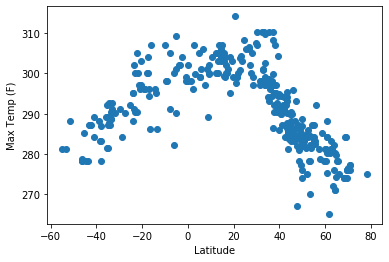

In [36]:
x_values = weather_data['Latitude']
y_values = weather_data['Maximum Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

In [37]:
plt.savefig('Lat_vs_Temp.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

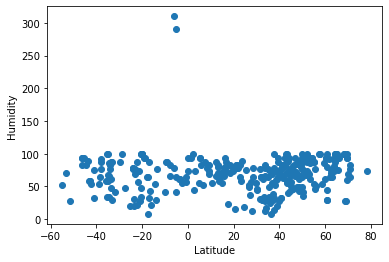

In [38]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [39]:
plt.savefig('Lat_vs_Hum.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

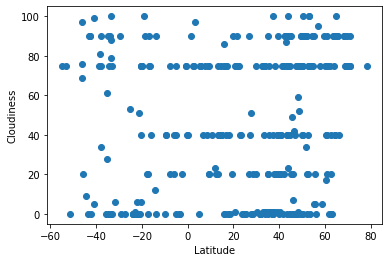

In [40]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [41]:
plt.savefig('CityLat_vs_Cloud.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

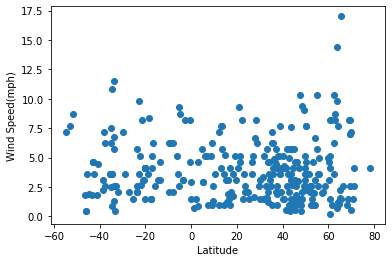

In [42]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.show()

In [43]:
plt.savefig('City_Lat_vs_Wind.png')

<Figure size 432x288 with 0 Axes>